#### First Ill import pandas,matplotlib and also load_digits dataset from sklearn.datasets

In [12]:
import pandas as pd
%matplotlib inline
import matplotlib.pyplot as plt
from sklearn.datasets import load_digits

In [ ]:
digits = load_digits()

dir -> find out column names

In [14]:
dir(digits)

['DESCR', 'data', 'feature_names', 'frame', 'images', 'target', 'target_names']

In [15]:
digits.data[0]

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

plot first 5 image.

<Figure size 432x288 with 0 Axes>

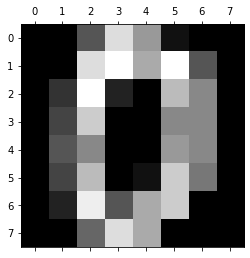

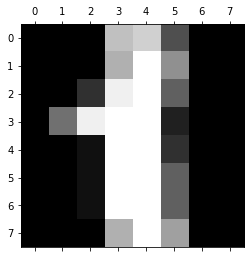

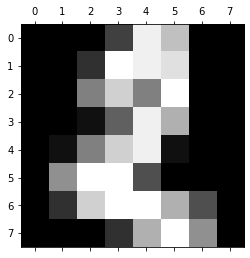

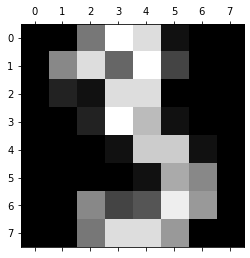

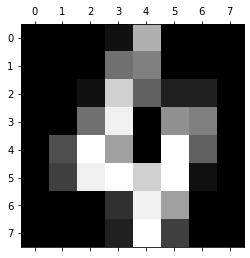

In [16]:
plt.gray()
for i in range(5):
   plt.matshow(digits.images[i])

target digits

In [17]:
digits.target[0:5]

array([0, 1, 2, 3, 4])

apply train_test_split method where from whole datasets a percentage of data will be up for training purpose and rest will be used for testing.

In [18]:
from sklearn.model_selection import train_test_split

test_size = .2 means 80 percent data will be used for training and 20% for testing.

In [19]:
x_train, x_test, y_train, y_test = train_test_split(digits.data, digits.target, test_size = 0.2)

inside x_train there, training data resides.

In [20]:
len(x_train)

1437

x_test -> tesing data resides

In [ ]:
len(x_test)

create logisticRegression class

In [21]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()

Train data using fit method

In [24]:
model.fit(x_train, y_train)

E:\Code\Py Code\Python installation\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

score means how much accurate my prediction is.

In [25]:
model.score(x_test, y_test)

0.9833333333333333

Check wheather my model predict the number.

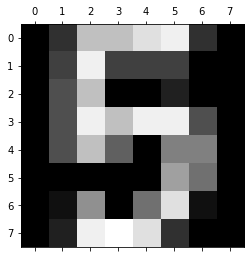

In [26]:
plt.matshow(digits.images[636])

again predict the 636th picture.

In [27]:
digits.target[636]

5

In [28]:
model.predict([digits.data[636]])

array([5])

Targeted number.

In [29]:
model.predict(digits.data[0:5])

array([0, 1, 2, 3, 4])

My model prediction is 98% so rest 2% my model gives wrong results. So, I wanted to find out where my model gives wrong results. Thats why I have used confusion_matrix. There I can find out my frequencies of wrong results.

In [30]:
y_predicted = model.predict(x_test)
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_predicted)
cm

array([[36,  0,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0, 35,  0,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0, 34,  0,  0,  0,  0,  0,  0,  0],
       [ 0,  0,  0, 29,  0,  0,  0,  0,  0,  0],
       [ 1,  0,  0,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0, 45,  0,  0,  0,  0],
       [ 0,  1,  0,  0,  0,  0, 40,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  0,  0, 26,  0,  0],
       [ 0,  1,  0,  0,  0,  0,  0,  0, 27,  1],
       [ 0,  0,  0,  1,  0,  0,  0,  0,  1, 38]], dtype=int64)

Text(69.0, 0.5, 'Truth')

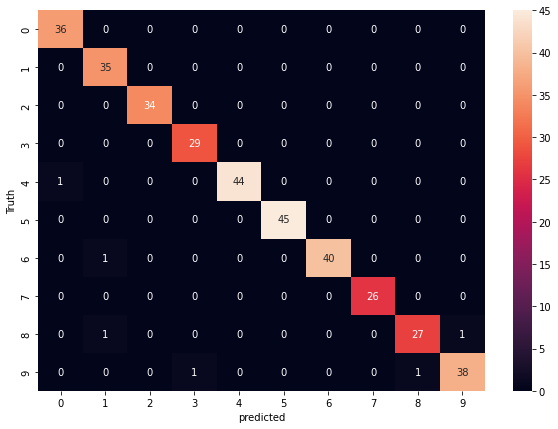

In [31]:
import seaborn as sn
plt.figure(figsize = (10,7))
sn.heatmap(cm, annot = True)
plt.xlabel('predicted')
plt.ylabel('Truth')